https://dicom-numpy.readthedocs.io/en/latest/

#### This command will unblock all files in a directory
get-childitem "C:\Users\caleb\Desktop\461P\FinalProj\Alz-Finders\preproc\002_S_0295\MP-RAGE\2006-04-1
8_08_20_30.0\S13408" | unblock-file

https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/

In [110]:
import pydicom
import dicom_numpy
import os
import numpy

from pydicom.data import get_testdata_files
from matplotlib import pyplot, cm


In [111]:
PathDicom = '002_S_0295/MP-RAGE/2006-04-18_08_20_30.0/S13408/'
listFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():
            listFilesDCM.append(os.path.join(dirName, filename))

In [112]:
# Get ref file
RefDs = pydicom.read_file(listFilesDCM[0])


# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims_ds = (128, 128, len(listFilesDCM))
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(listFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [113]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

x_ds = numpy.arange(0.0, (ConstPixelDims_ds[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y_ds = numpy.arange(0.0, (ConstPixelDims_ds[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z_ds = numpy.arange(0.0, (ConstPixelDims_ds[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [114]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ArrayDicom_ds = numpy.zeros(ConstPixelDims_ds, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in listFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    pa = ds.pixel_array
    pa_ds = ds.pixel_array[::2, ::2]
    ArrayDicom[:, :, listFilesDCM.index(filenameDCM)] = pa
    ArrayDicom_ds[:, :, listFilesDCM.index(filenameDCM)] = pa_ds
    
print(ArrayDicom.shape)
print(ArrayDicom_ds.shape)

ValueError: could not broadcast input array from shape (128,128) into shape (256,256)

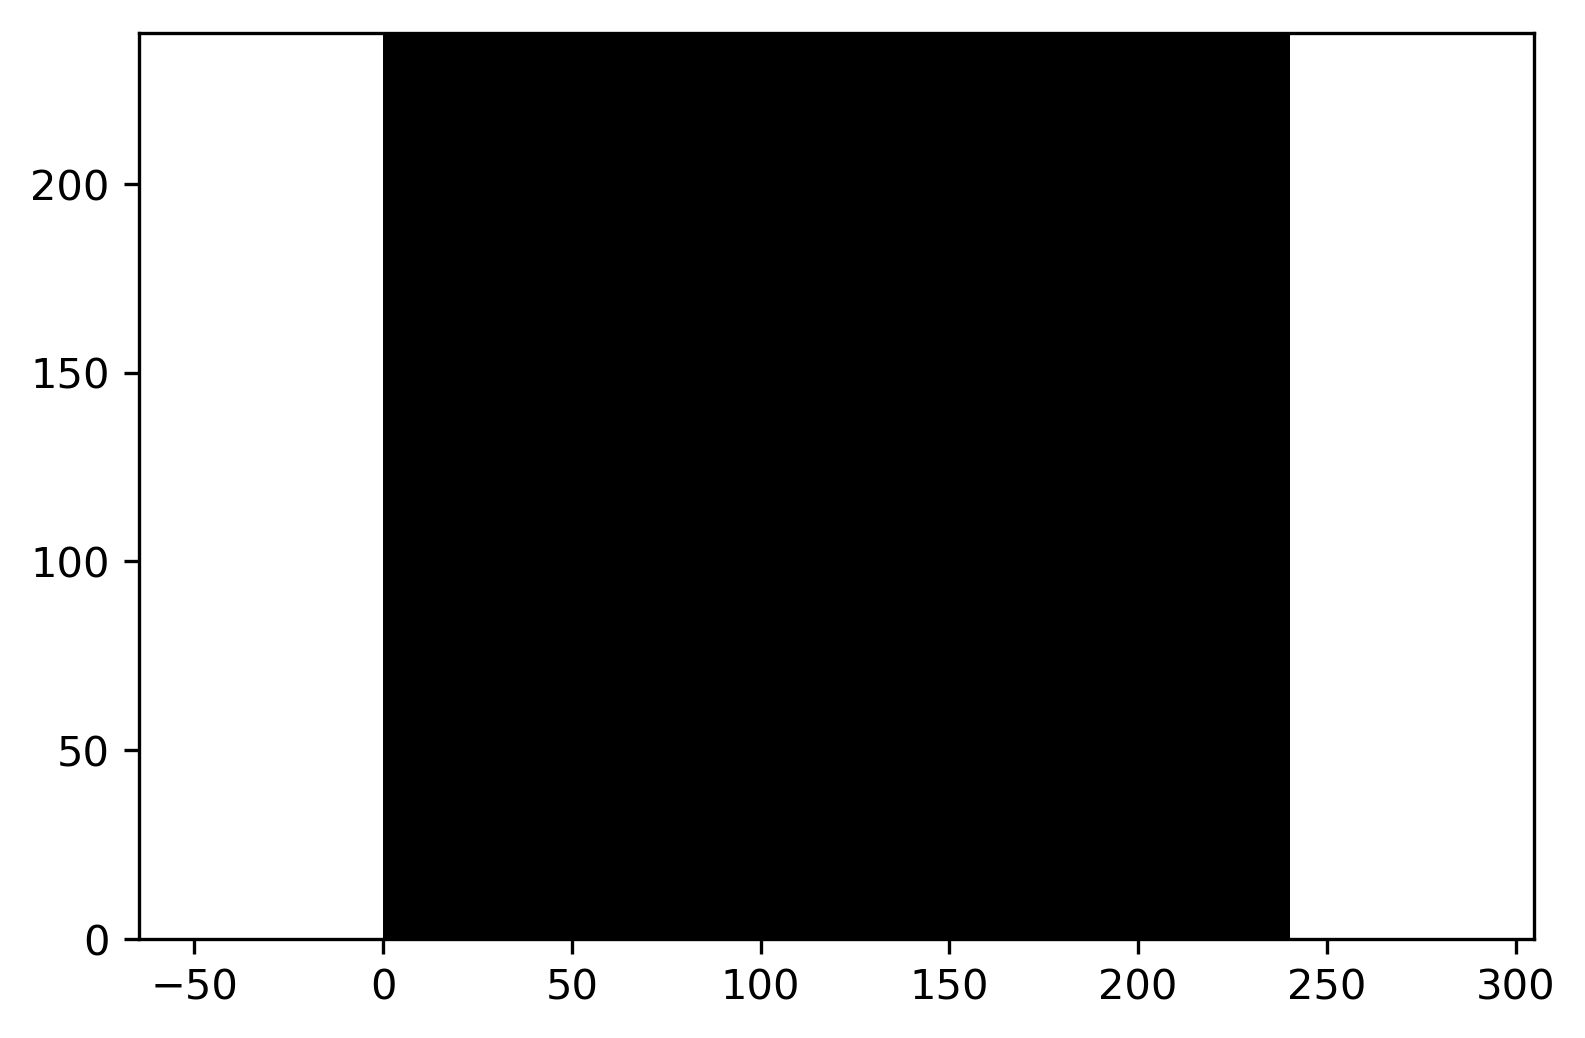

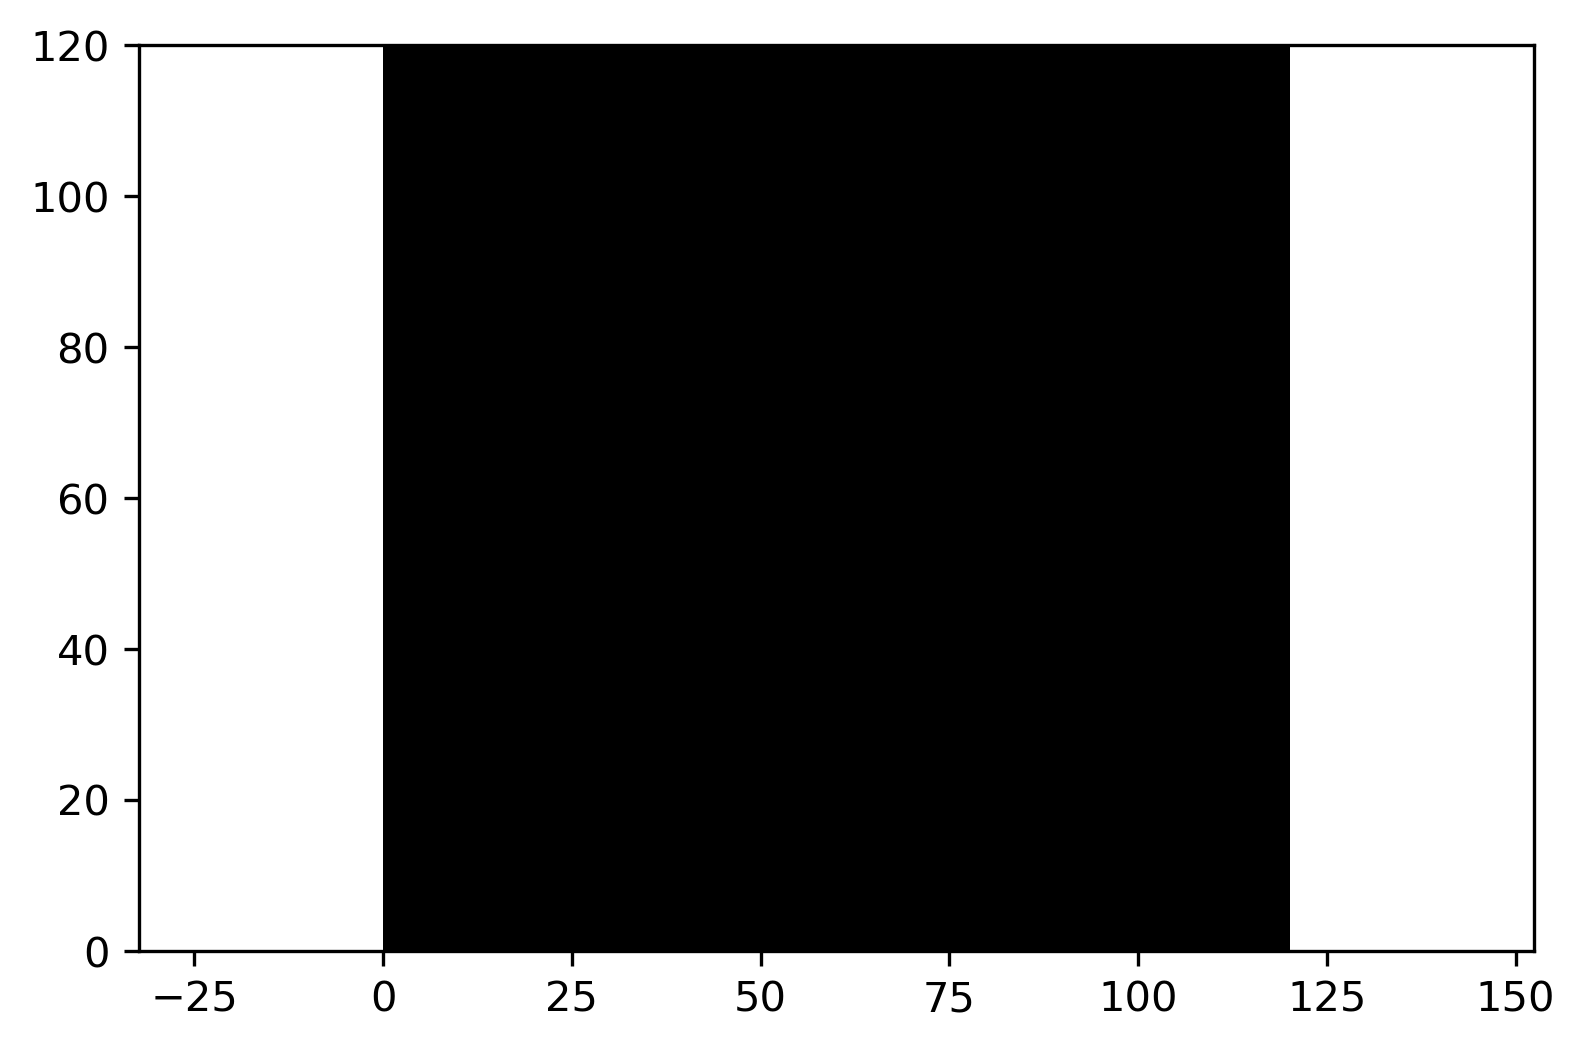

In [115]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 80]))

pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x_ds, y_ds, numpy.flipud(ArrayDicom_ds[:, :, 80]))